<a href="https://colab.research.google.com/github/fastdatascience/clinical_trial_risk/blob/fixes_nov_2022/train/ctgov/TrainNumArmsClassifier_22_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import pandas as pd
import re
import os
import sys
import pickle as pkl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import json

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, auc, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_annotations = pd.read_csv("/content/drive/MyDrive/data/all_annotations.csv")


# Get data

In [4]:
stats_stopwords = set("""A&H
Abbott
Actelion
Aesica pharmaceuticals
Air Products
Alcon
ALK-Abello
Allergan
Alpharma
Almus Pharmaceuticals
Altana
Amgen
APS
Assertio
AstraZeneca
Aventis Pharma
Bausch & Lomb
Baxter
Baxter BioScience
Bayer
Becton Dickinson
Beiersdorf
Berk
Biogen
Boehringer Ingelheim
Boots
BPL
Braun
Bristol-Myers Squibb
Celltech
Cephalon
Chemidex
Chugai
Colgate-Palmolive
Coloplast
ConvaTec
Cow & Gate
CP
Crookes
Dentsply
Dista
DuPont
Eisai
Ethicon
Fabre
Ferring
Florizel
Fresenius SE
Galderma
Galpharm Healthcare
Garnier
GE Healthcare
Gilead
GlaxoSmithKline
Grünenthal
Grifols
GSK
GSK Consumer Healthcare
Heinz
Hillcross
Hoechst Marion Roussel
Invicta
Ipsen
ITH Pharma Ltd
IVAX
J&J
J&J Medical
J&J MSD
Janssen-Cilag
King
Kyowa Hakko
Lederie
LEO
LifeScan
Lilly
Lundbeck
Martindale Pharma
Mölnlycke
Mayne
McNeil
Meda
Medac
MediSense
Menarini
Menarini Diagnostics
Merck
Merck Consumer Health
Merck & Co.
Milupa
MSD
Nestlé
Nestlè Clinical
Neutrogena
Novartis
Novartis Consumer Health
Novo Nordisk
Nycomed
Octapharma
Orion
Otsuka
Parke-Davis
Pfizer
Pharmacia
Procter & Gamble
Procter & Gamble Pharm.
Reckitt Benckiser
Rhône-Poulenc
Roche
Roche Consumer Health
Roche Diagnostics
Rosemont
Rybar
Salts
Sandoz
Sankyo
Sanofi-Aventis
Sanofi Oasteur
Sanofi-Synthélabo
Schering-Plough
Schwarz
Searle
Serono
Servier
Shire
SHS
Sigma
SMA Nutrition
SNBTS
Solvay
Squibb
SSL
Stiefel
Takeda
Taro
Teva
Thornton & Ross
Trinity-Chiesi
Tyco
Univar
Valeant
Viatris
W-L
Warner Lambert
Wockhardt
Wyeth
Yamanouchi
title
study
protocol
participant
participants
irb
africa
trial
patient
patients
treatment
short
trial
gov
sponsor
university
delivery
co
usa
phone
edu
principal
investigators
laboratory
department
us
email
institute
centre
com
confidentiality
confidential
information
must
investigator
team
relevant
ethics
regulatory
contents
research
non
summary
background
rationale
primary
sites
population
interventions
pubmed
January
February
March
April
May
June
July
August
September
October
November
December
Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday
Mon
Tue
Wed
Thu
Fri
Sat
Sun
recommendations
length
experienced
making
contain
girls
youth
sms
mobile
economic
uptake
vac
rotavirus
vivax
azithromycin
parasite
stool
placental
village
malaria
ya
plasmodium
png
toc
path
iron
measles
anaemia
vitamin
ultrasound
chloroquine
aerosol
supplementation
gestation
dp
cq
transfusion
gestational
skip
pr
iga
ia
vials
relapse
br
pp
growth
tropical
parents
vi
mass
triple
fetal
anemia
endemic
postnatal
diarrhea
feeding
antenatal
water
food
swabs
pcr
nurse
specify
titers
cmc
workers
hvtn
taf
chc
impaact
rpv
cab
mab
hptn
ral
itraconazole
dtg
linkage
amphotericin
ip
alvac
nichd
ftc
wrair
mva
ts
hiv
antepartum
tdf
aidsvax
vrc
efv
ring
crs
infusion
env
daids
subtype
hbv
psrt
cq
rv
viral
vaginal
arv
bivalent
arvs
zdv
sc
meningitis
sti
mcg
virologic
suppression
antiretroviral
combinations
ucsf
neutralizing
counseling
bid
niaid
tenofovir
abc
aeras
dar
qft
bedaquiline
stream
bdq
mtb
bcg
abidjan
sputum
mdr
tb
anrs
alliance
qtcf
moxifloxacin
xpert
att
cld
inh
ppd
igra
ics
tuberculosis
ltbi
iris
pyrazinamide
biologicals
prednisone
mrc
qt
rct
pa
atp
genexpert
proprietary
hair
dst
imp
rif
quantiferon
ifn
si
idmc
ctu
smc
reproduction
injection
shells
multidrug
isoniazid
pulmonary
corticosteroids
focused
mycobacterium
unfavourable
reserved
ds
tubes
lp
vaccinated
cytokine
copyright
qtc
suspicion
allowable
vaccination
ipt
favourable
stimulation
coordination
rifampicin
ray
tnf
pbmcs
cultures
immunology
csf
uln
revaccination
profiling
iec
ap
baby
al
tel
org
community
mailto
md
doi
pk
fax
ac
medicine
communities
uk
pmid
srl
survey
epub
appendix
plasma
prevention
srvge
rawres
rvge
pt
wise
dehydration
serotype
fifth
cut
reactogenicity
whose
stools
vomiting
immunity
immunogenicity
expressing
characteristics
exact
circumference
preferred
intussusception
postpartum
episodes
added
missing
across
yes
prenatal
difference
symptom
markers
end
gastroenteritis
third
maternal
age
second
enrolment
objective
code
month
last
overall
included
populations
excluded
case
blinded
year
term
severity
done
start
group
lead
subjects
definition
subject
definitions
unsolicited
cases
cohort
cohorts
least
days
post
month
months
level
levels
among
per
size
sizes
figure
figures
comparisons
date
dates
birth
births
hospitalization
hospitalizations
hospitalisation
hospitalisations
hospital
hospitals
woman
women
time
times
considered
weight
weights
never
number
dated
listing
breastfeeding
introduction
arm
arms
data
using
use
score
source
use
used
uses
protocol
protocols
subject
subjects
trial
trials
doctor
doctors
eg
get
getting
got
gotten
rx
dapivirine""".split("\n"))

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 21.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=38bfb059c884994c42f956e5aa8e7aa2e032a9403712ee5bca65796401a6d9ef
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [7]:
import pycountry


In [8]:
tok = RegexpTokenizer(r'[a-zA-Z]+')

stops = set(stopwords.words('english')).union(set(stopwords.words('french'))).union(stats_stopwords)

for c in pycountry.countries:
    for t in tok.tokenize(c.name.lower()):
        if t not in ("monte", "carlo"):
            stops.add(t)

In [9]:
with open("/content/drive/MyDrive/data/protocols.pkl.gz", "rb") as f:
    file_to_pages = pkl.load(f)

In [10]:
import operator
texts = []

for i in range(len(df_annotations)):
    file_name = df_annotations.file.iloc[i]
    
    pages= file_to_pages[file_name]

    texts.append(" ".join(pages))
df_annotations["text"] = texts

In [11]:
 del file_to_pages

In [12]:
df_annotations = df_annotations[~df_annotations.num_arms.isna()]

In [13]:
def get_num_arms_clean(num):
    if pd.isna(num):
        return None
    if num >= 3:
        return "3+"
    return str(int(num))
df_annotations["num_arms_clean"] = df_annotations["num_arms"].apply(get_num_arms_clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
df_annotations["num_arms_clean"].value_counts()

2     5228
3+    3277
1     3086
Name: num_arms_clean, dtype: int64

In [15]:
labels = list(sorted(set(df_annotations["num_arms_clean"])))

In [16]:
df_train = df_annotations[df_annotations.train_val == "train"]
df_val = df_annotations[df_annotations.train_val == "val"]

In [17]:

# Specially engineered regex to include 95%, 95%ci, etc
vectoriser = CountVectorizer(lowercase=True, stop_words = stops, min_df=5,
                            token_pattern=r'\w+', ngram_range=[1,2], max_features=5000)

transformer = TfidfTransformer()

nb = MultinomialNB()
model = make_pipeline(vectoriser, transformer, nb)

In [18]:
# df_train_small = df_train.sample(1000)

In [19]:
model.fit(df_train.text, df_train.num_arms_clean)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abbott', 'abello', 'actelion', 'aesica', 'air', 'alcon', 'alk', 'allergan', 'almus', 'alpharma', 'altana', 'amgen', 'apr', 'april', 'aps', 'assertio', 'astrazeneca', 'aug', 'august', 'aventis', 'bausch', 'baxter', 'bayer', 'becton', 'beiersdorf', 'benckiser', 'berk', 'biogen', 'bioscience', 'boehringer', 'boots', 'bpl', 'braun', 'bristol', 'celltech', 'cephalon', 'chemidex', 'chiesi', 'chugai', 'cilag', 'clinical', 'colgate', 'coloplast', 'consumer', 'convatec', 'cow', 'cp', 'crookes', 'davis', 'dec', 'december', 'dentsply', 'diagnostics', 'dickinson', 'dista', 'dupont', 'eisai', 'ethicon', 'fabre', 'feb', 'february', 'ferring', 'florizel', 'fresenius', 'fri', 'friday', 'galderma', 'galpharm', 'gamble', 'garnier', 'gate', 'ge', 'gilead', 'glaxosmithkline', 'grifols', 'grünenthal', 'gsk', 'h'

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=5000, min_df=5,
                                 ngram_range=[1, 2],
                                 stop_words={'A&H', 'ALK-Abello', 'APS',
                                             'Abbott', 'Actelion',
                                             'Aesica pharmaceuticals',
                                             'Air Products', 'Alcon',
                                             'Allergan',
                                             'Almus Pharmaceuticals',
                                             'Alpharma', 'Altana', 'Amgen',
                                             'Apr', 'April', 'Assertio',
                                             'AstraZeneca', 'Aug', 'August',
                                             'Aventis Pharma', 'BPL',
                                             'Bausch & Lomb', 'Baxter',
                                             'Baxter BioScience', 'Bayer'

In [20]:
df_val["y_pred"] = model.predict(df_val.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_val["y_pred"]

12        2
49        1
50        2
51        2
52        2
         ..
11902     1
11903    3+
11904     2
11906     1
11907     2
Name: y_pred, Length: 1056, dtype: object

In [22]:
y_pred_proba = model.predict_proba(df_val.text)

In [23]:
y_pred_proba

array([[0.06417946, 0.56616794, 0.3696526 ],
       [0.55343891, 0.30101909, 0.145542  ],
       [0.09480645, 0.73743173, 0.16776181],
       ...,
       [0.06998998, 0.62234534, 0.30766469],
       [0.82542909, 0.13682928, 0.03774163],
       [0.13158072, 0.44038001, 0.42803927]])

In [24]:

ground_truths = df_val.num_arms_clean
pred = df_val.y_pred

In [25]:
pred

12        2
49        1
50        2
51        2
52        2
         ..
11902     1
11903    3+
11904     2
11906     1
11907     2
Name: y_pred, Length: 1056, dtype: object

In [26]:
acc = accuracy_score(ground_truths, pred)
print (f"accuracy {acc}")

accuracy 0.5359848484848485


In [27]:
pred

12        2
49        1
50        2
51        2
52        2
         ..
11902     1
11903    3+
11904     2
11906     1
11907     2
Name: y_pred, Length: 1056, dtype: object

''

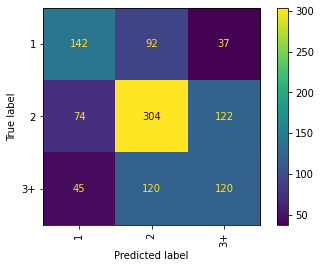

In [28]:
ConfusionMatrixDisplay.from_predictions(ground_truths, pred)
plt.xticks(rotation=90)
;

In [29]:
all_aucs = []
from sklearn.metrics import roc_auc_score
for i, label in enumerate(list(nb.classes_)):
  roc_auc = roc_auc_score(ground_truths==label, y_pred_proba[:,i])
  print (f"ROC AUC {roc_auc}")
  all_aucs.append(roc_auc)
print (np.mean(all_aucs))

ROC AUC 0.7809575293205161
ROC AUC 0.6829244604316546
ROC AUC 0.6848385555328008
0.7162401817616572


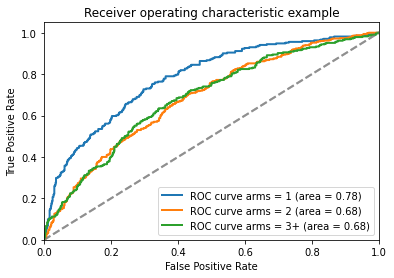

In [30]:
plt.figure()
lw = 2
    
for i, label in enumerate(list(nb.classes_)):
    fpr, tpr, _ = roc_curve(ground_truths==label, y_pred_proba[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        # color="darkorange",
        lw=lw,
        label=f"ROC curve arms = {label} (area = {roc_auc:0.2f})"
    )
    plt.plot([0, 1], [0, 1], color="gray", alpha=0.5, lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [36]:
fake_document = " ".join(vectoriser.vocabulary_)
vectorised_document = vectoriser.transform([fake_document])
transformed_document = transformer.transform(vectorised_document)
probas = np.zeros((transformed_document.shape[1]))


In [37]:
vocab_lookup = {i:w for w, i in vectoriser.vocabulary_.items()}
with open("num_arms_diagnostics.txt", "w", encoding="utf-8") as f:
  for prediction_idx in [0, 1, 2]:
        f.write(f"Strongest predictors for class {nb.classes_[prediction_idx]}\n")
        for i in range(transformed_document.shape[1]):
            zeros = np.zeros(transformed_document.shape)
            zeros[0, i] = transformed_document[0, i]
            proba = nb.predict_log_proba(zeros)
            probas[i] = proba[0, prediction_idx]


        for ctr, j in enumerate(np.argsort(-probas)):
          f.write(f"{ctr}\t{vocab_lookup[j]}\n")

In [ ]:
import bz2
with bz2.open("arms_classifier_document_level.pkl.bz2", "wb") as f:
    pkl.dump(model, f)

In [ ]:
from google.colab import runtime
runtime.unassign()